In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping


In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.describe()

footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.000000    3.000000    14.000000    0.000000  
50%      2.000000   44.000000    4.000000    17.000000    0.000000  
75%      5.000000   58.000000    6.000000    21.000000    1.000000  
max      6.000000   91.000000    7.000000    24.000000    1.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [12]:
df.head()

footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

In [13]:
df.tail()

footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

In [16]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values using forward fill method
df.ffill(inplace=True)

# Alternatively, you can use backward fill method if preferred
# df.bfill(inplace=True)


footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


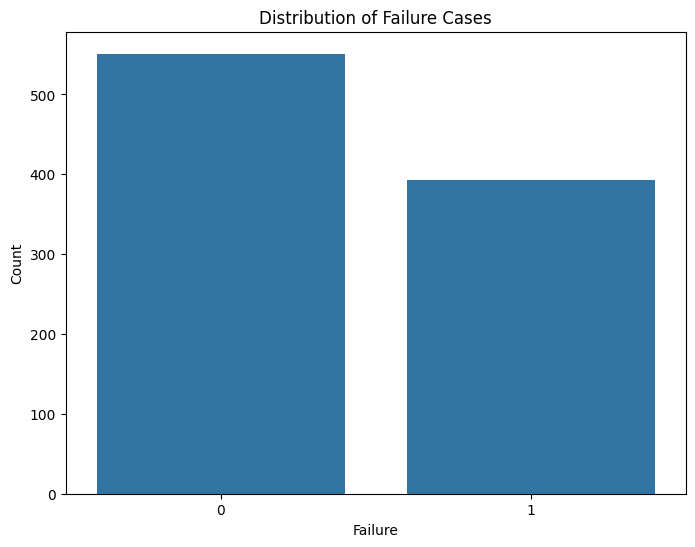

In [23]:
# Plot the distribution of the target variable 'fail'
plt.figure(figsize=(8, 6))
sns.countplot(x='fail', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

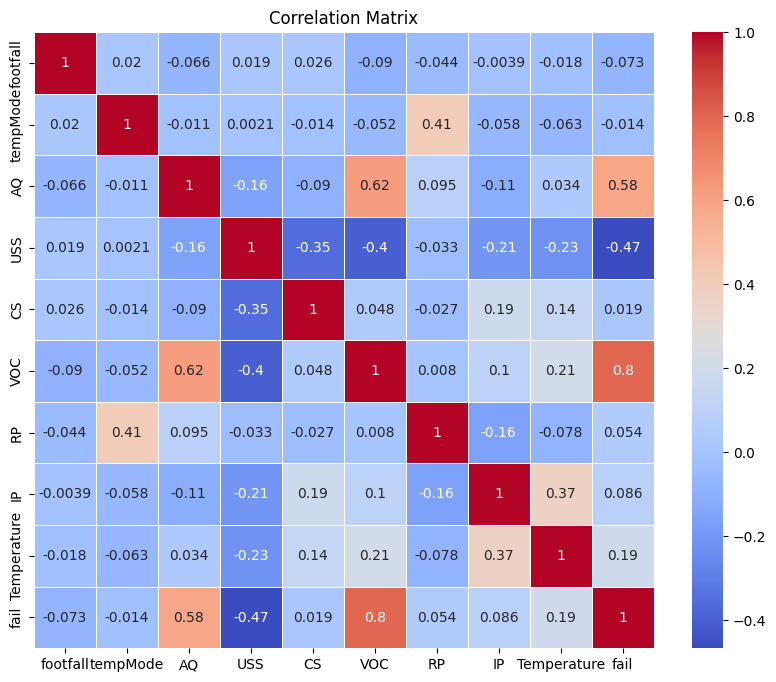

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = df.drop('fail', axis=1)
y = df['fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7267 - loss: 0.6847 - val_accuracy: 0.8675 - val_loss: 0.6598
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8441 - loss: 0.6480 - val_accuracy: 0.8874 - val_loss: 0.6066
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8795 - loss: 0.5853 - val_accuracy: 0.8940 - val_loss: 0.5168
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8968 - loss: 0.4841 - val_accuracy: 0.9073 - val_loss: 0.4047
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9024 - loss: 0.3807 - val_accuracy: 0.9007 - val_loss: 0.3181
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9161 - loss: 0.2848 - val_accuracy: 0.8940 - val_loss: 0.2686
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9078 - loss: 0.2485 - val_accuracy: 0.8874 - val_loss: 0.2501
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9268 - loss: 0.2154 - val_accuracy: 0.8940 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.3277 
Test Loss: 0.34636133909225464
Test Accuracy: 0.8783068656921387


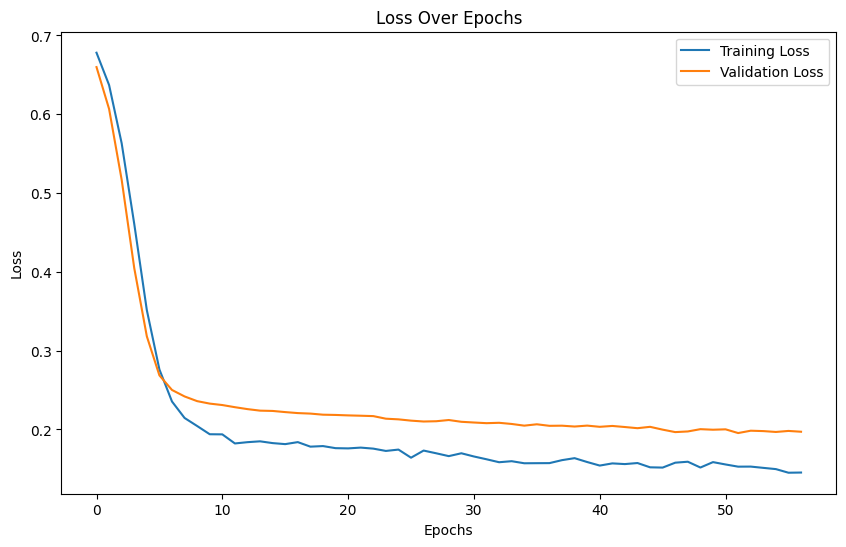

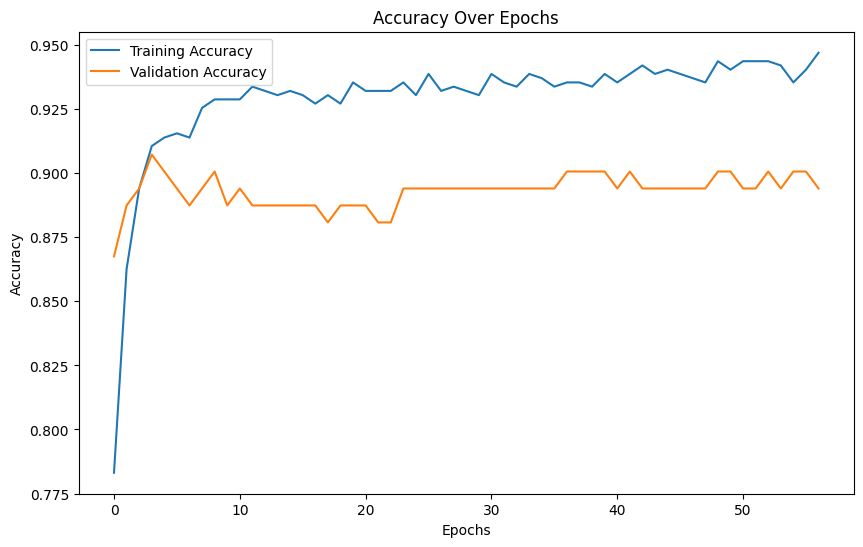

In [32]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


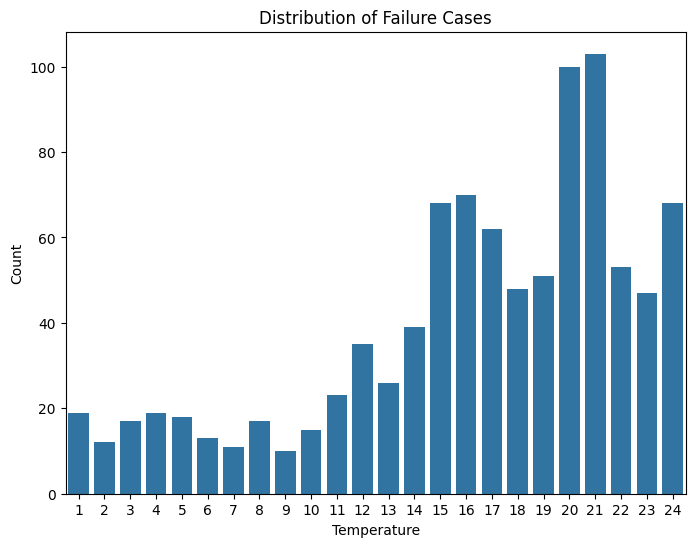

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Temperature', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

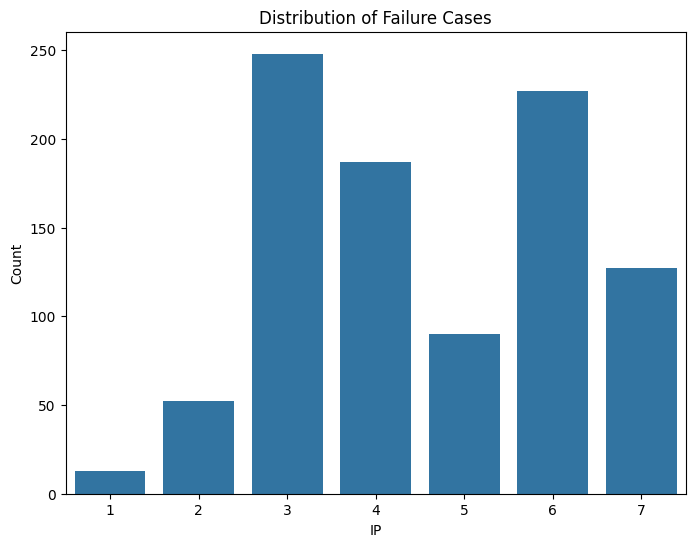

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IP', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('IP')
plt.ylabel('Count')
plt.show()

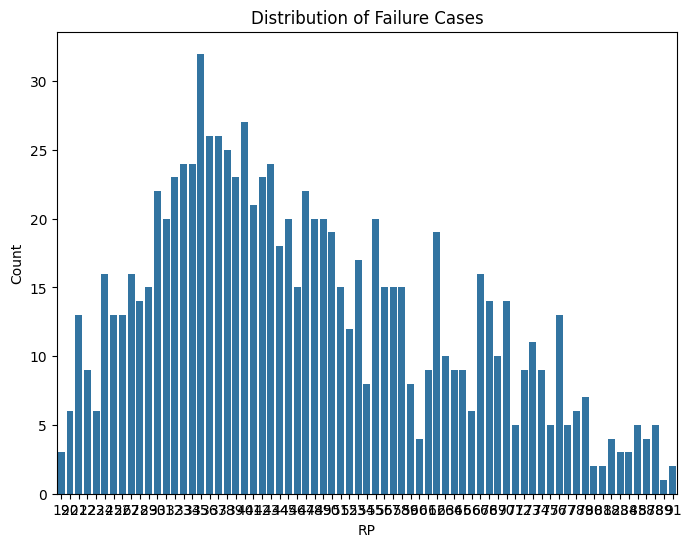

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RP', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('RP')
plt.ylabel('Count')
plt.show()

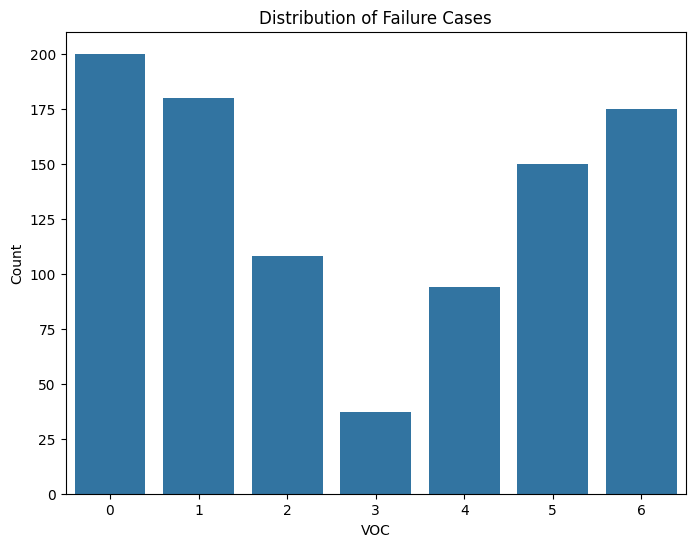

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='VOC', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('VOC')
plt.ylabel('Count')
plt.show()

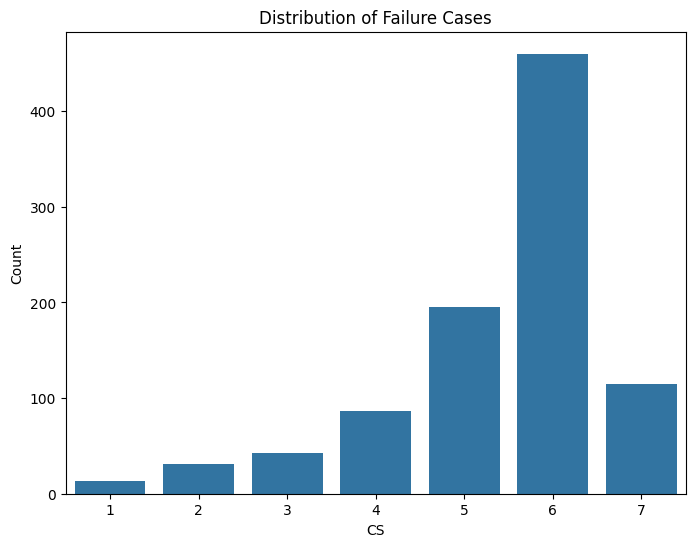

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='VOC', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('VOC')
plt.ylabel('Count')
plt.show()

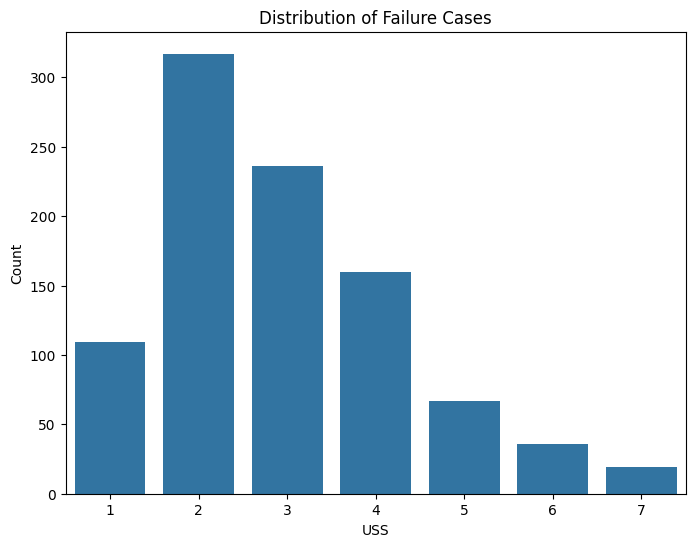

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='USS', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('USS')
plt.ylabel('Count')
plt.show()

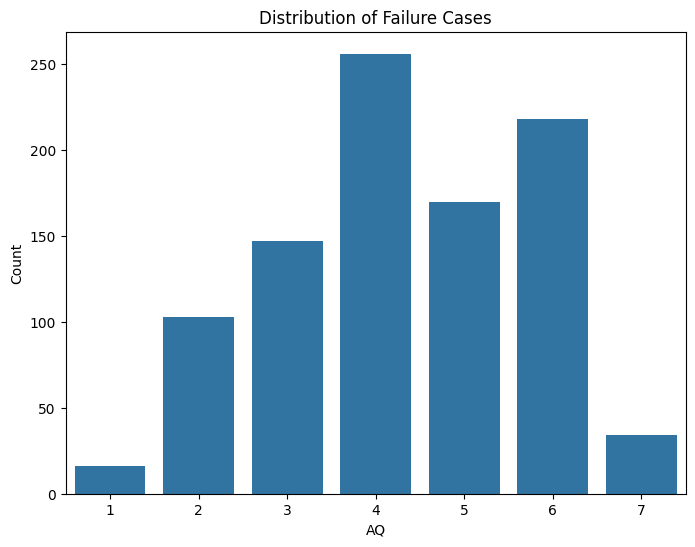

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AQ', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('AQ')
plt.ylabel('Count')
plt.show()

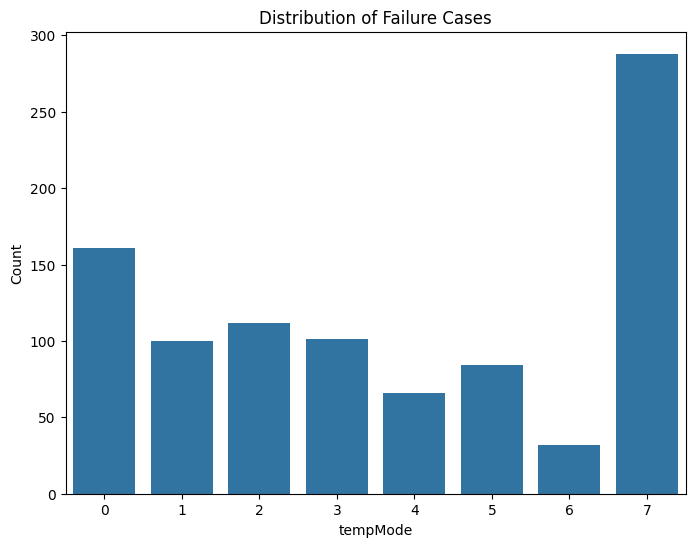

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='tempMode', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('tempMode')
plt.ylabel('Count')
plt.show()

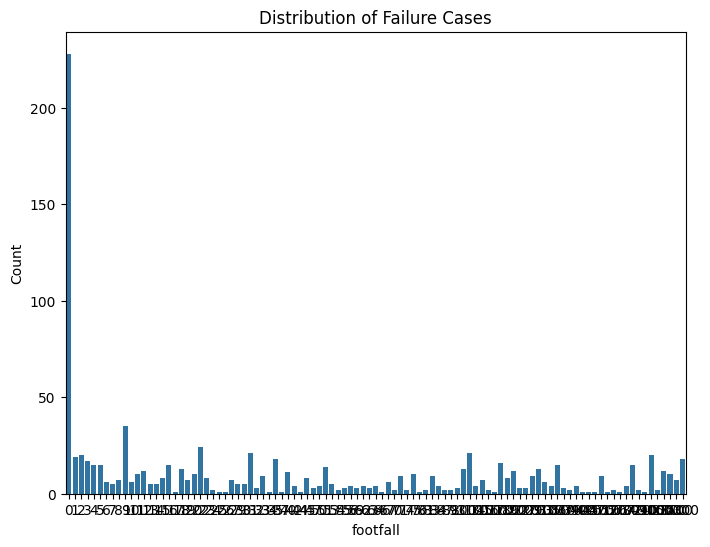

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='footfall', data=df)
plt.title('Distribution of Failure Cases')
plt.xlabel('footfall')
plt.ylabel('Count')
plt.show()

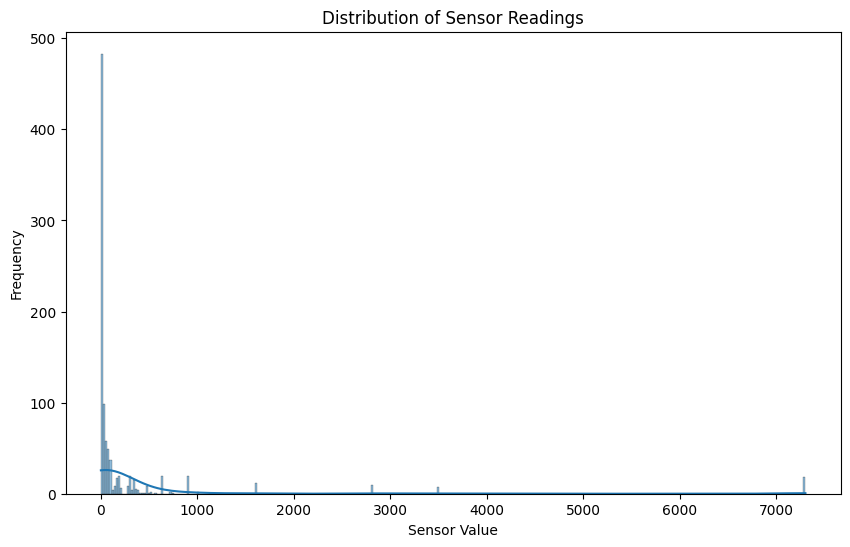

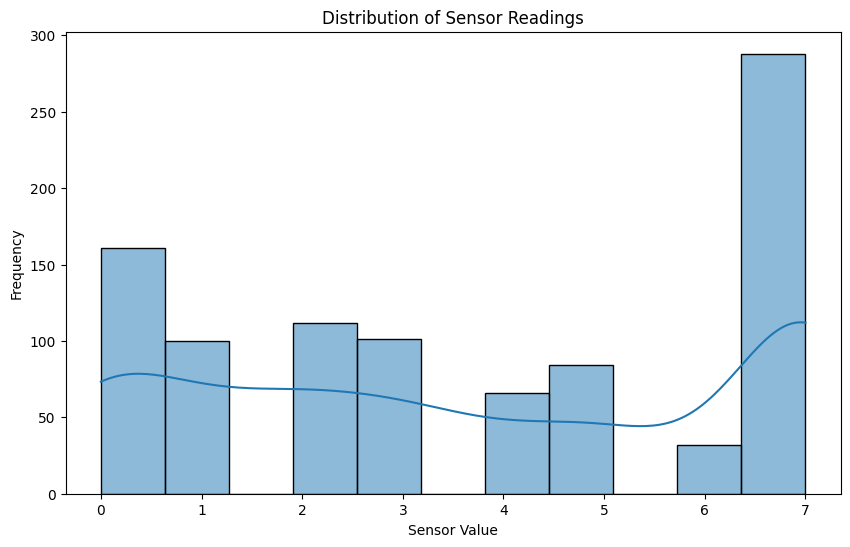

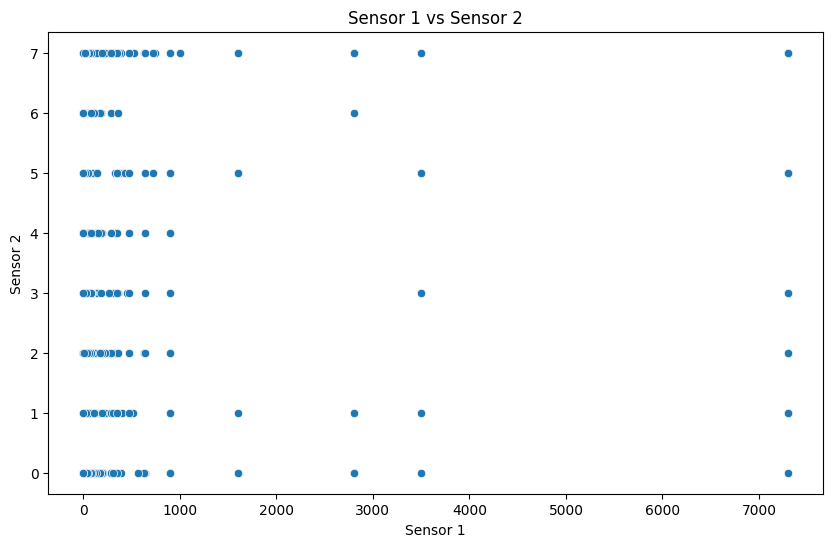

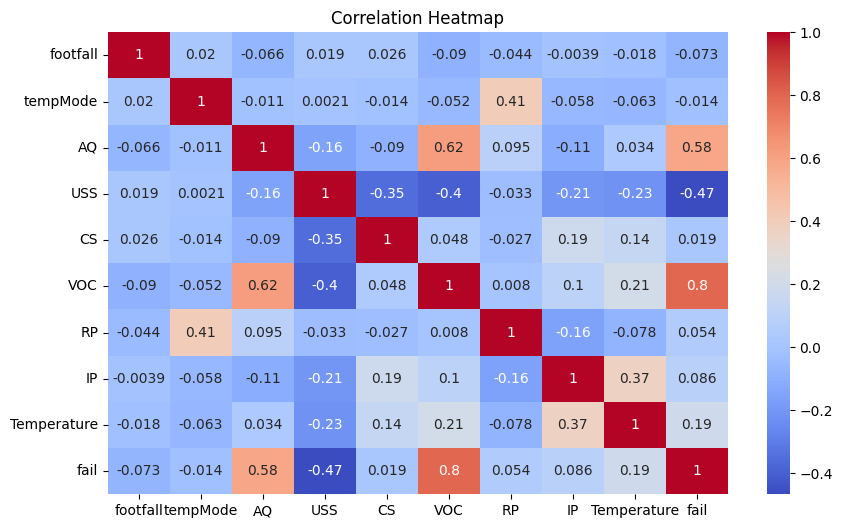

In [48]:
# Assuming missing values should be filled with mean of the column
df.fillna(df.mean(), inplace=True)

# Extract relevant features for all pairs of sensors
# Get sensor columns (assuming they are all numeric)
sensor_columns = df.select_dtypes(include=[np.number]).columns

# Create new features for each pair of sensors
for i in range(len(sensor_columns)):
    for j in range(i + 1, len(sensor_columns)):
        sensor_1 = sensor_columns[i]
        sensor_2 = sensor_columns[j]
        df[f'{sensor_1}_minus_{sensor_2}'] = df[sensor_1] - df[sensor_2]
        df[f'{sensor_1}_avg_{sensor_2}'] = (df[sensor_1] + df[sensor_2]) / 2

# Data visualization for all sensor columns
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} Value')
    plt.ylabel('Frequency')
    plt.show()

# Pairwise scatter plots for all sensor columns
sns.pairplot(df[sensor_columns])
plt.suptitle('Pairwise Scatter Plots of Sensor Data', y=1.02)
plt.show()

# Correlation heatmap for all columns including new features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Saving the cleaned and feature engineered data
df.to_csv('cleaned_data.csv', index=False)

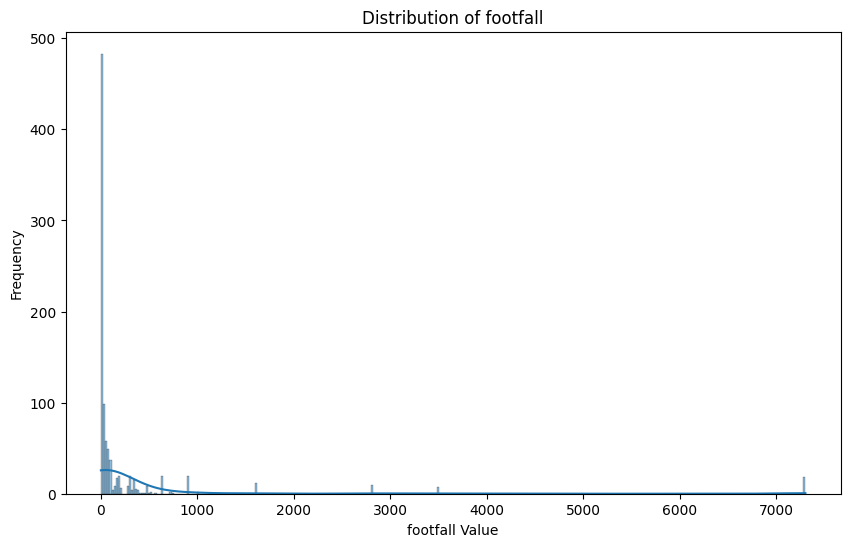

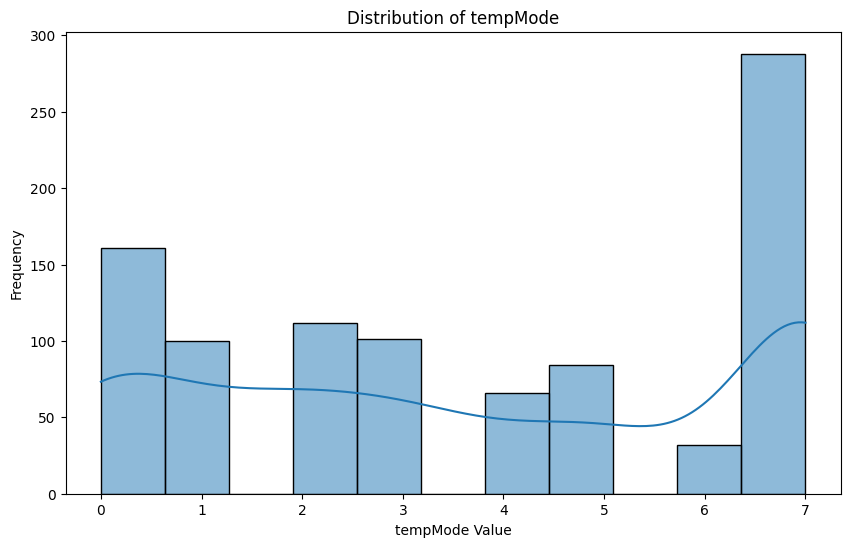

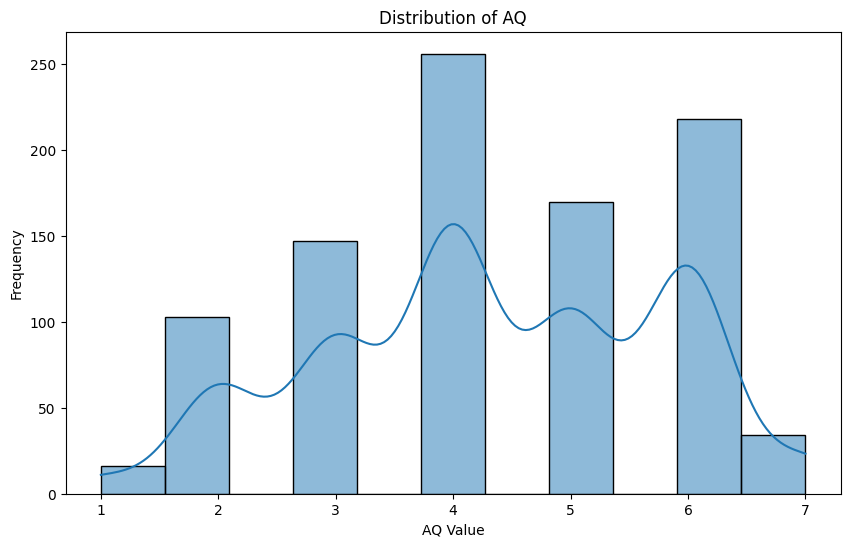

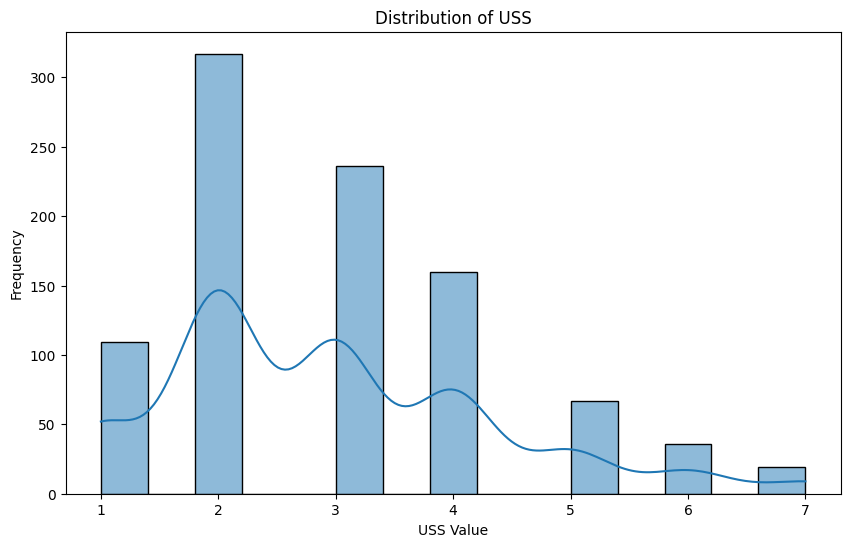

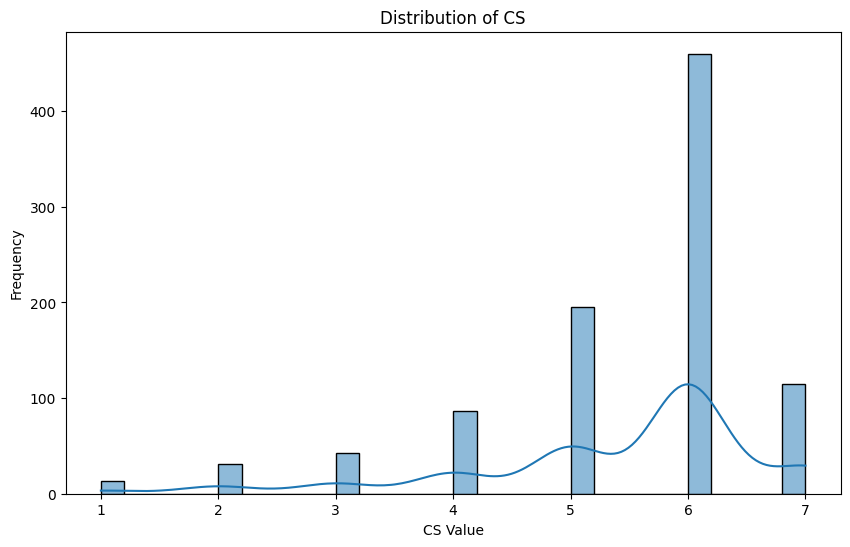

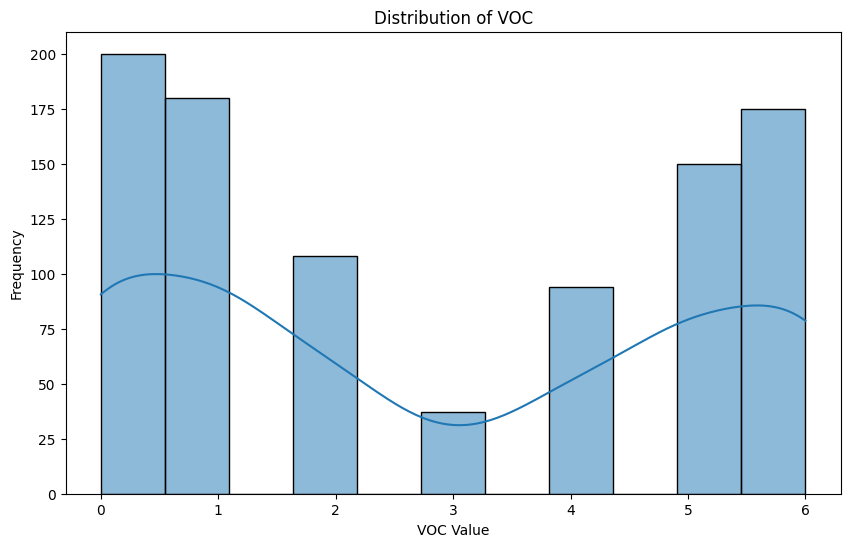

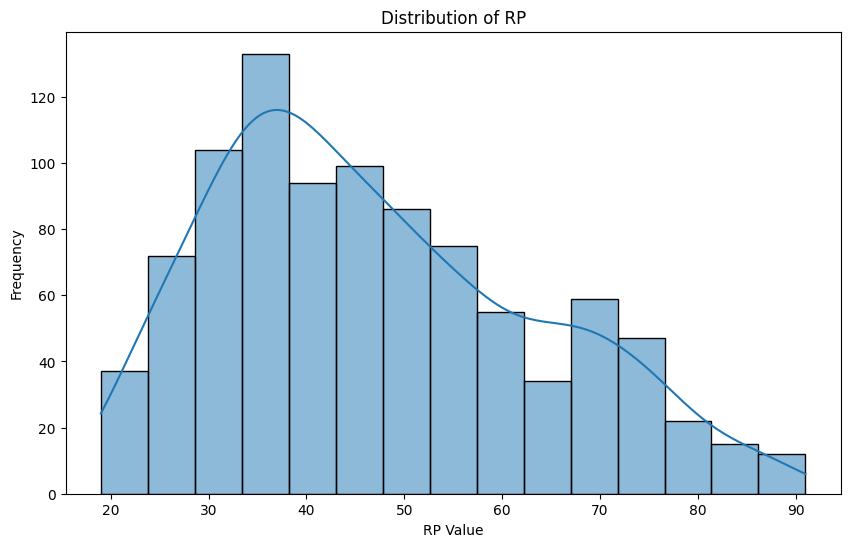

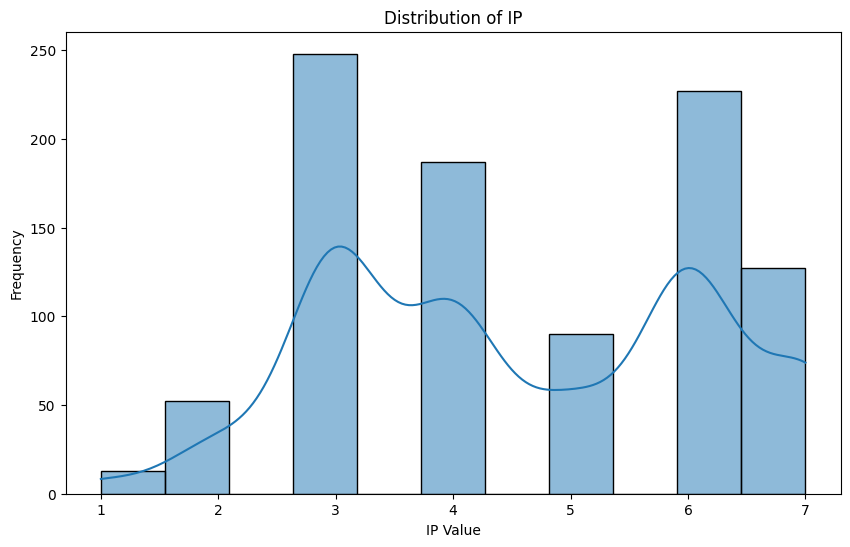

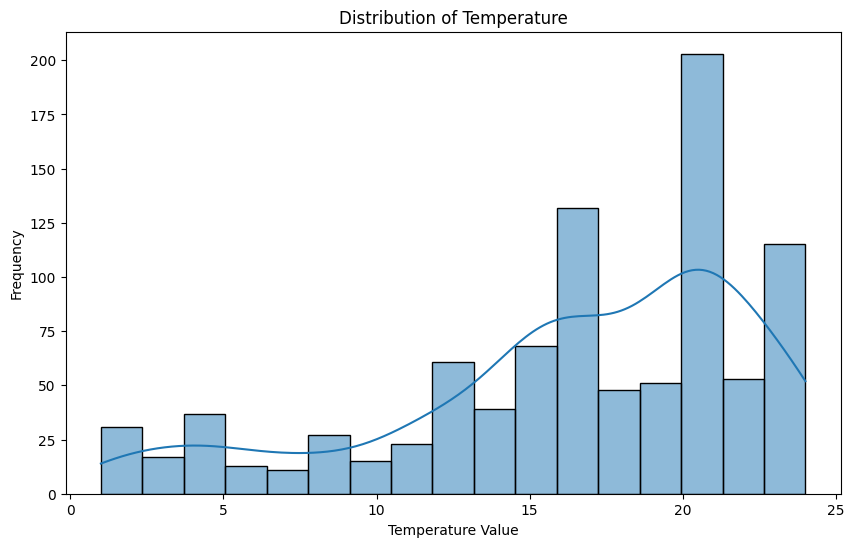

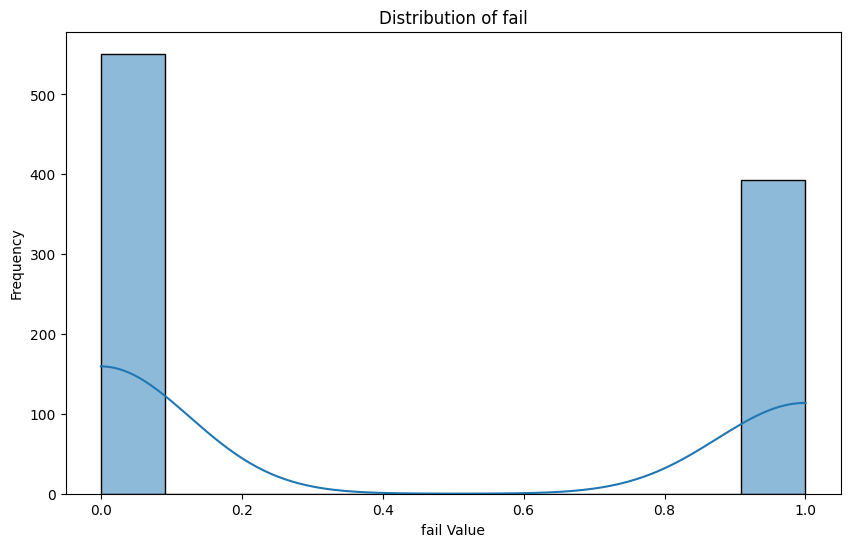

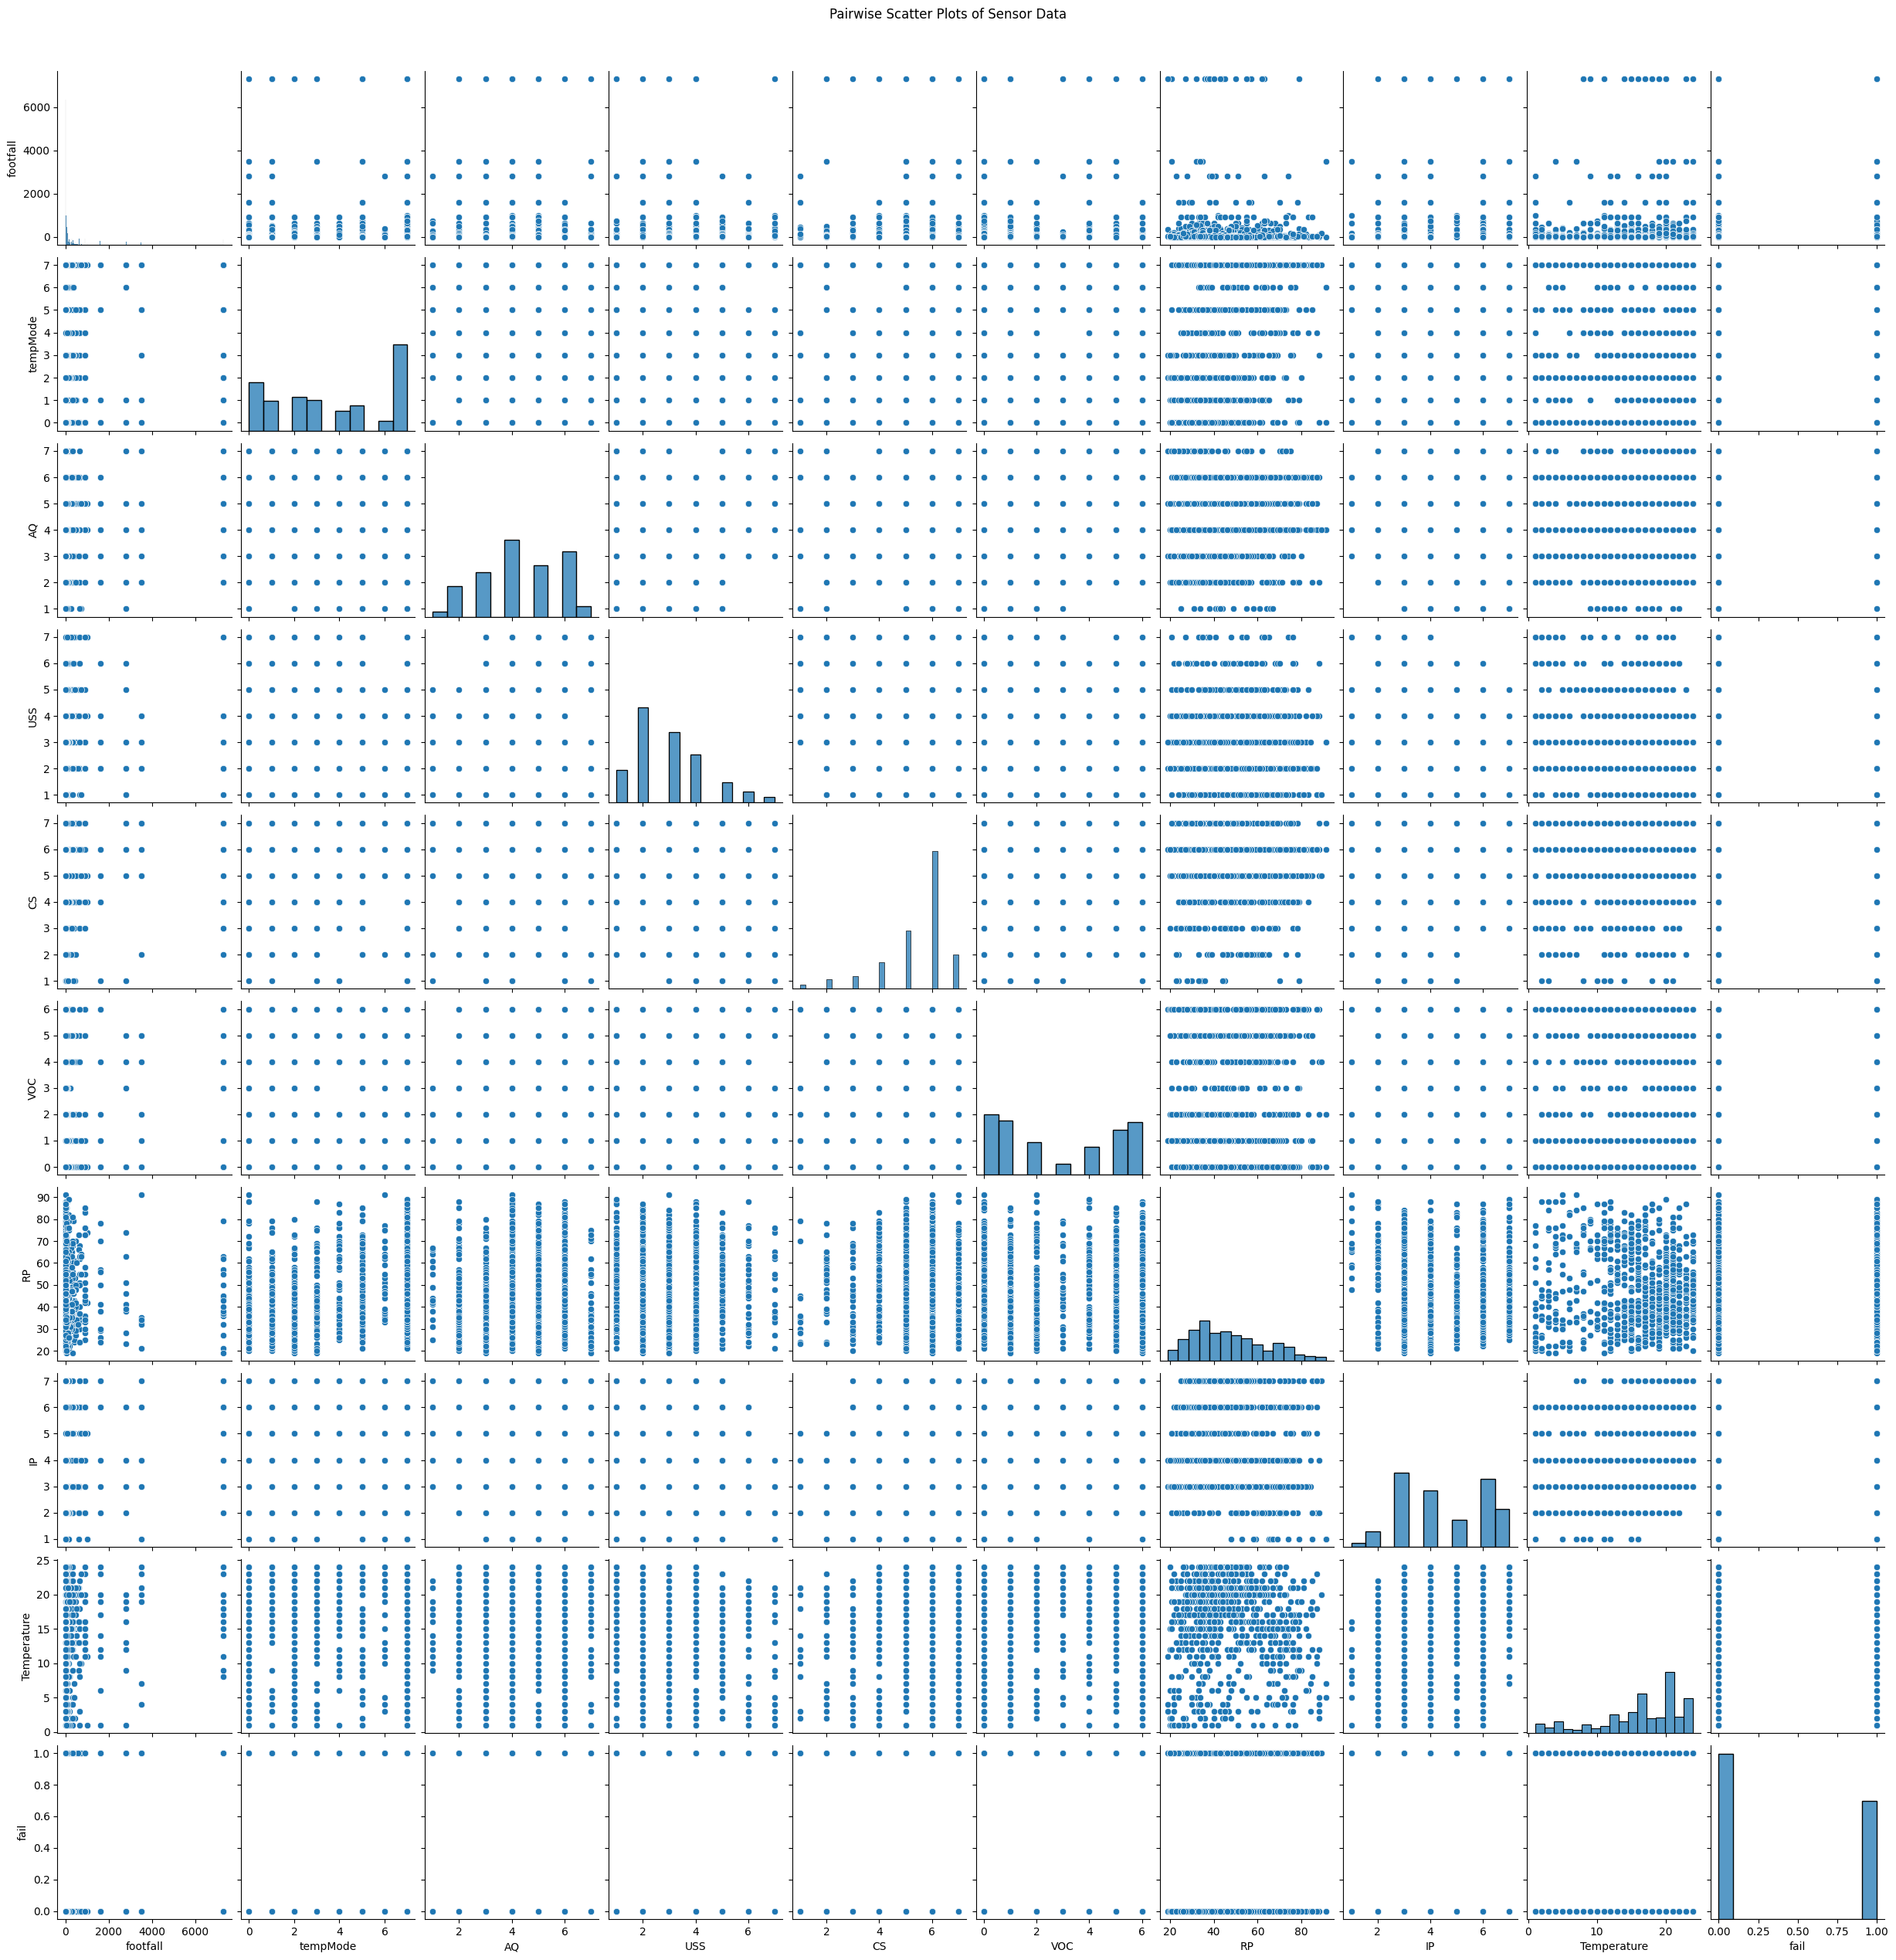

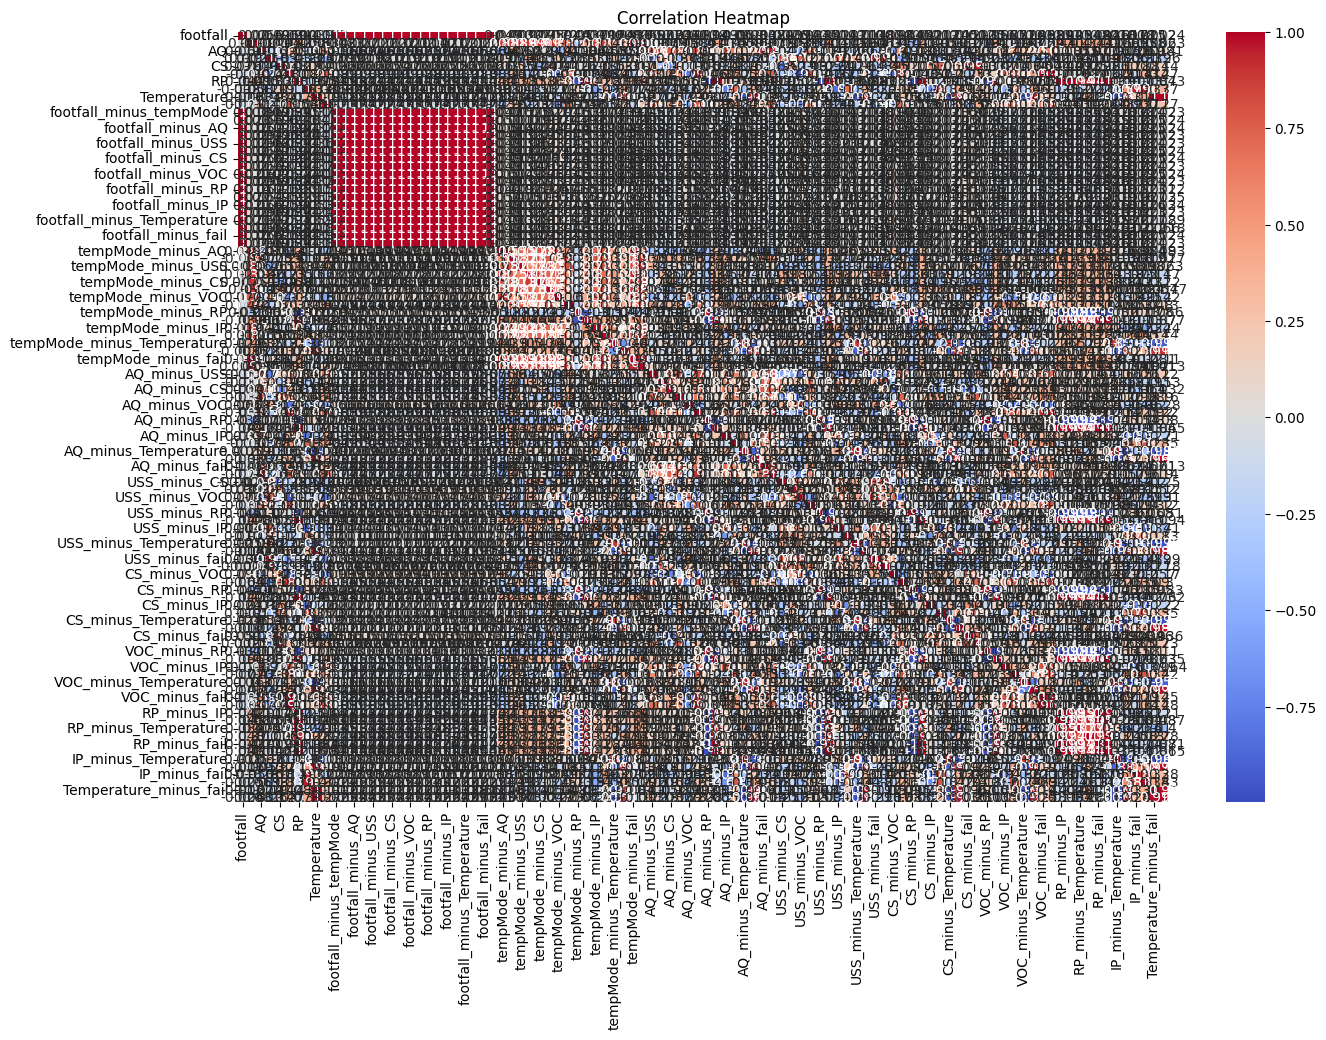

In [49]:
# Assuming missing values should be filled with mean of the column
df.fillna(df.mean(), inplace=True)

# Extract relevant features for all pairs of sensors
# Get sensor columns (assuming they are all numeric)
sensor_columns = df.select_dtypes(include=[np.number]).columns

# Create new features for each pair of sensors
for i in range(len(sensor_columns)):
    for j in range(i + 1, len(sensor_columns)):
        sensor_1 = sensor_columns[i]
        sensor_2 = sensor_columns[j]
        df[f'{sensor_1}_minus_{sensor_2}'] = df[sensor_1] - df[sensor_2]
        df[f'{sensor_1}_avg_{sensor_2}'] = (df[sensor_1] + df[sensor_2]) / 2

# Data visualization for all sensor columns
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} Value')
    plt.ylabel('Frequency')
    plt.show()

# Pairwise scatter plots for all sensor columns
sns.pairplot(df[sensor_columns])
plt.suptitle('Pairwise Scatter Plots of Sensor Data', y=1.02)
plt.show()

# Correlation heatmap for all columns including new features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Saving the cleaned and feature engineered data
df.to_csv('cleaned_data.csv', index=False)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data
df = pd.read_csv('data.csv')

# Print columns to verify content
print("Columns in the dataset:")
print(df.columns)

# Define the correct target variable name
target = 'fail'

# Ensure 'fail' is in columns
if target not in df.columns:
    raise ValueError(f"Target variable '{target}' not found in dataset columns. Columns found: {df.columns}")

# Feature columns (excluding the target variable)
features = df.drop(columns=[target]).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Columns in the dataset:
Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')
Confusion Matrix:
[[143  17]
 [ 15 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.87      0.88      0.87       124

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.89      0.89      0.89       284


ROC-AUC Score:
0.9444808467741936

Feature Importance:
VOC            0.451079
AQ             0.181351
USS            0.134649
CS             0.056690
footfall       0.046427
RP             0.044130
Temperature    0.039455
IP             0.025777
tempMode       0.020441
dtype: float64
